In [1]:
from pylab import *
%matplotlib inline
import random

# 1

Sea una partícula encerrada en un círculo de radio R y con energía $E = \frac{p^2}{2mR^2}$ y velocidad angular $\theta' = w = \frac{p}{mR^2}$ con impulsos discretos donde $\Delta p = \epsilon cos(\theta)$


# a

Primero, como $\Delta p = \epsilon cos(\theta)$ entonces $p_{i+1} - p_{i} = \epsilon cos(\theta)$ con lo cual $p_{i+1} = p_{i} + \epsilon cos(\theta)$

Entonces, como $\theta = \theta_0 + w\tau$ y después del impulso ya se cuenta $p_{i+1}$ entonces aplicará $w = \frac{p_{i+1}}{mR^2}$ y $\theta = \theta_0 + \frac{p_{i+1}}{mR^2}\tau$

# b

Usaremos el integrador RK4

In [6]:
def rk4_a(ec,p_ini,x,args=0,h=0.1):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

Y resolveremos el sistema

$$
\theta' = \frac{p}{mR^2}
$$

In [7]:
def ecuacion(theta,t,p):
    dtheta = p
    return dtheta

In [8]:
def rand(n,t):
    rand = zeros(n+1)
    for i in arange(n):
        rand[i] = array([random.uniform(t[0],t[1])])
    return rand

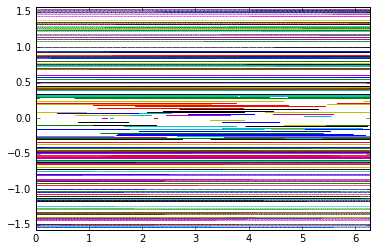

In [10]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])

#for i in arreglo_p:
    #arreglo_p[i] = p_0[i]

for j in arange(200):
    p_j = p_0[j]
    theta_j = theta_0[j]
    t,sol = rk4_a(ecuacion,[theta_j],[0,20],p_j,0.01)
    
    arreglo_p = zeros(len(sol))
    for i in arange(len(sol)):
        arreglo_p[i] = p_j
    
    for k in arange(len(sol)):
        if sol[k] < 0:
            sol[k] = sol[k] + 2*pi
            
        elif sol[k] > 2*pi:
            sol[k] = sol[k] - 2*pi
            
    
    plot(sol,arreglo_p,'.',markersize = 0.5)
    xlim(0,2*pi)
    ylim(-pi/2,pi/2)
    

Vemos que empieze donde empieze el momento se mantiene constante para todo $\theta$ porque no hay perturbación. Cerca del cero hay un hoyo porque ahí $\theta$ casi no cambia.

# c

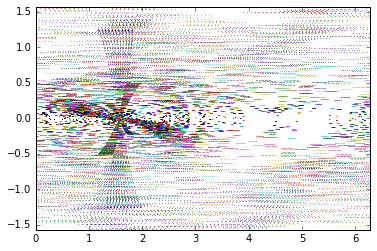

In [11]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])
tao = 0.5
t = [0,40]
epsilon = 0.1

tiempo = arange(t[0],t[1]+tao,tao)
sol = zeros(len(tiempo))

for j in arange(200):
    for ii in arange(80):
        sol[0] = theta_0[j]
        theta_j = sol[-1]
        #sol[ii] = theta_j
        p_j = p_0[j] + epsilon*ii*cos(sol[-1])
        
        t,sol = rk4_a(ecuacion,[sol[-1]],[tiempo[ii],tiempo[ii+1]],p_j)

        arreglo_p = zeros(len(sol))
        for i in arange(len(sol)):
            arreglo_p[i] = p_j

        for k in arange(len(sol)):
            if sol[k] < 0:
                sol[k] = sol[k] + 2*pi

            elif sol[k] > 2*pi:
                sol[k] = sol[k] - 2*pi


        plot(sol,arreglo_p,'.',markersize = 0.5)
        xlim(0,2*pi)
        ylim(-pi/2,pi/2)
    

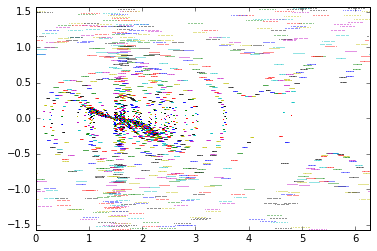

In [12]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])
tao = 0.2
t = [0,40]
epsilon = 0.1

tiempo = arange(t[0],t[1]+tao,tao)
sol = zeros(len(tiempo))

for j in arange(50):
    for ii in arange(200):
        sol[0] = theta_0[j]
        theta_j = sol[-1]
        #sol[ii] = theta_j
        p_j = p_0[j] + epsilon*ii*cos(sol[-1])
        
        t,sol = rk4_a(ecuacion,[sol[-1]],[tiempo[ii],tiempo[ii+1]],p_j)

        arreglo_p = zeros(len(sol))
        for i in arange(len(sol)):
            arreglo_p[i] = p_j

        for k in arange(len(sol)):
            if sol[k] < 0:
                sol[k] = sol[k] + 2*pi

            elif sol[k] > 2*pi:
                sol[k] = sol[k] - 2*pi


        plot(sol,arreglo_p,'.',markersize = 0.5)
        xlim(0,2*pi)
        ylim(-pi/2,pi/2)
    

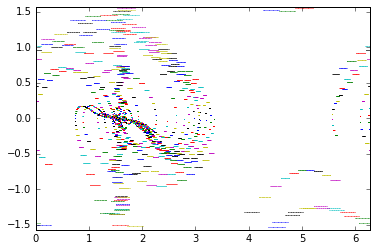

In [187]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])
tao = 0.2
t = [0,40]
epsilon = 0.1

tiempo = arange(t[0],t[1]+tao,tao)
sol = zeros(len(tiempo))

for j in arange(25):
    for ii in arange(200):
        sol[0] = theta_0[j]
        theta_j = sol[-1]
        #sol[ii] = theta_j
        p_j = p_0[j] + epsilon*ii*cos(sol[-1])
        
        t,sol = rk4_a(ecuacion,[sol[-1]],[tiempo[ii],tiempo[ii+1]],p_j)

        arreglo_p = zeros(len(sol))
        for i in arange(len(sol)):
            arreglo_p[i] = p_j

        for k in arange(len(sol)):
            if sol[k] < 0:
                sol[k] = sol[k] + 2*pi

            elif sol[k] > 2*pi:
                sol[k] = sol[k] - 2*pi


        plot(sol,arreglo_p,'.',markersize = 0.5)
        xlim(0,2*pi)
        ylim(-pi/2,pi/2)
    

Vemos que si parece haber un punto fijo en (1.5,0), además del punto fijo trivial (0,0)

Las anteriores son diferentes simulaciones para 0.1, ahora pondremos

# 0.01

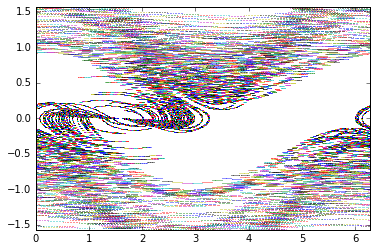

In [13]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])
tao = 0.2
t = [0,40]
epsilon = 0.01

tiempo = arange(t[0],t[1]+tao,tao)
sol = zeros(len(tiempo))

for j in arange(100):
    for ii in arange(200):
        sol[0] = theta_0[j]
        theta_j = sol[-1]
        #sol[ii] = theta_j
        p_j = p_0[j] + epsilon*ii*cos(sol[-1])
        
        t,sol = rk4_a(ecuacion,[sol[-1]],[tiempo[ii],tiempo[ii+1]],p_j)

        arreglo_p = zeros(len(sol))
        for i in arange(len(sol)):
            arreglo_p[i] = p_j

        for k in arange(len(sol)):
            if sol[k] < 0:
                sol[k] = sol[k] + 2*pi

            elif sol[k] > 2*pi:
                sol[k] = sol[k] - 2*pi


        plot(sol,arreglo_p,'.',markersize = 0.5)
        xlim(0,2*pi)
        ylim(-pi/2,pi/2)
    

# 0.05

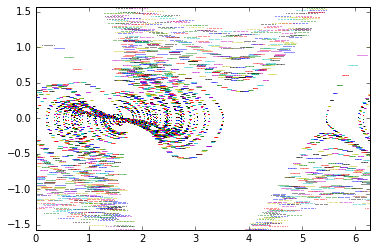

In [14]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])
tao = 0.2
t = [0,40]
epsilon = 0.05

tiempo = arange(t[0],t[1]+tao,tao)
sol = zeros(len(tiempo))

for j in arange(100):
    for ii in arange(200):
        sol[0] = theta_0[j]
        theta_j = sol[-1]
        #sol[ii] = theta_j
        p_j = p_0[j] + epsilon*ii*cos(sol[-1])
        
        t,sol = rk4_a(ecuacion,[sol[-1]],[tiempo[ii],tiempo[ii+1]],p_j)

        arreglo_p = zeros(len(sol))
        for i in arange(len(sol)):
            arreglo_p[i] = p_j

        for k in arange(len(sol)):
            if sol[k] < 0:
                sol[k] = sol[k] + 2*pi

            elif sol[k] > 2*pi:
                sol[k] = sol[k] - 2*pi


        plot(sol,arreglo_p,'.',markersize = 0.5)
        xlim(0,2*pi)
        ylim(-pi/2,pi/2)
    

# 0.2

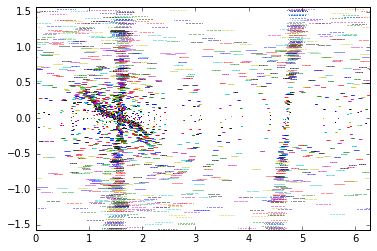

In [15]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])
tao = 0.2
t = [0,40]
epsilon = 0.2

tiempo = arange(t[0],t[1]+tao,tao)
sol = zeros(len(tiempo))

for j in arange(100):
    for ii in arange(200):
        sol[0] = theta_0[j]
        theta_j = sol[-1]
        #sol[ii] = theta_j
        p_j = p_0[j] + epsilon*ii*cos(sol[-1])
        
        t,sol = rk4_a(ecuacion,[sol[-1]],[tiempo[ii],tiempo[ii+1]],p_j)

        arreglo_p = zeros(len(sol))
        for i in arange(len(sol)):
            arreglo_p[i] = p_j

        for k in arange(len(sol)):
            if sol[k] < 0:
                sol[k] = sol[k] + 2*pi

            elif sol[k] > 2*pi:
                sol[k] = sol[k] - 2*pi


        plot(sol,arreglo_p,'.',markersize = 0.5)
        xlim(0,2*pi)
        ylim(-pi/2,pi/2)
    

# 0.3

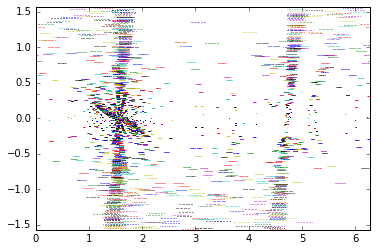

In [20]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])
tao = 0.2
t = [0,40]
epsilon = 0.3

tiempo = arange(t[0],t[1]+tao,tao)
sol = zeros(len(tiempo))

for j in arange(100):
    for ii in arange(200):
        sol[0] = theta_0[j]
        theta_j = sol[-1]
        #sol[ii] = theta_j
        p_j = p_0[j] + epsilon*ii*cos(sol[-1])
        
        t,sol = rk4_a(ecuacion,[sol[-1]],[tiempo[ii],tiempo[ii+1]],p_j)

        arreglo_p = zeros(len(sol))
        for i in arange(len(sol)):
            arreglo_p[i] = p_j

        for k in arange(len(sol)):
            if sol[k] < 0:
                sol[k] = sol[k] + 2*pi

            elif sol[k] > 2*pi:
                sol[k] = sol[k] - 2*pi


        plot(sol,arreglo_p,'.',markersize = 0.5)
        xlim(0,2*pi)
        ylim(-pi/2,pi/2)
    

# 0.4

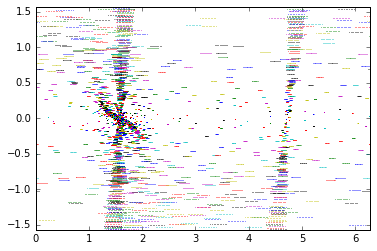

In [17]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])
tao = 0.2
t = [0,40]
epsilon = 0.4

tiempo = arange(t[0],t[1]+tao,tao)
sol = zeros(len(tiempo))

for j in arange(100):
    for ii in arange(200):
        sol[0] = theta_0[j]
        theta_j = sol[-1]
        #sol[ii] = theta_j
        p_j = p_0[j] + epsilon*ii*cos(sol[-1])
        
        t,sol = rk4_a(ecuacion,[sol[-1]],[tiempo[ii],tiempo[ii+1]],p_j)

        arreglo_p = zeros(len(sol))
        for i in arange(len(sol)):
            arreglo_p[i] = p_j

        for k in arange(len(sol)):
            if sol[k] < 0:
                sol[k] = sol[k] + 2*pi

            elif sol[k] > 2*pi:
                sol[k] = sol[k] - 2*pi


        plot(sol,arreglo_p,'.',markersize = 0.5)
        xlim(0,2*pi)
        ylim(-pi/2,pi/2)
    

# 0.7

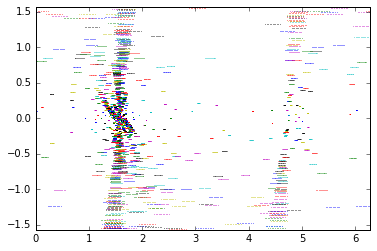

In [18]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])
tao = 0.2
t = [0,40]
epsilon = 0.7

tiempo = arange(t[0],t[1]+tao,tao)
sol = zeros(len(tiempo))

for j in arange(100):
    for ii in arange(200):
        sol[0] = theta_0[j]
        theta_j = sol[-1]
        #sol[ii] = theta_j
        p_j = p_0[j] + epsilon*ii*cos(sol[-1])
        
        t,sol = rk4_a(ecuacion,[sol[-1]],[tiempo[ii],tiempo[ii+1]],p_j)

        arreglo_p = zeros(len(sol))
        for i in arange(len(sol)):
            arreglo_p[i] = p_j

        for k in arange(len(sol)):
            if sol[k] < 0:
                sol[k] = sol[k] + 2*pi

            elif sol[k] > 2*pi:
                sol[k] = sol[k] - 2*pi


        plot(sol,arreglo_p,'.',markersize = 0.5)
        xlim(0,2*pi)
        ylim(-pi/2,pi/2)
    

# 1.1

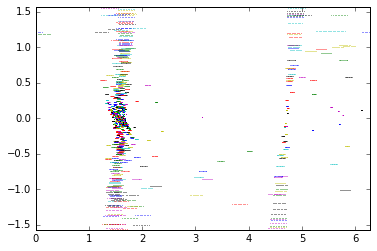

In [19]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])
tao = 0.2
t = [0,40]
epsilon = 1.1

tiempo = arange(t[0],t[1]+tao,tao)
sol = zeros(len(tiempo))

for j in arange(100):
    for ii in arange(200):
        sol[0] = theta_0[j]
        theta_j = sol[-1]
        #sol[ii] = theta_j
        p_j = p_0[j] + epsilon*ii*cos(sol[-1])
        
        t,sol = rk4_a(ecuacion,[sol[-1]],[tiempo[ii],tiempo[ii+1]],p_j)

        arreglo_p = zeros(len(sol))
        for i in arange(len(sol)):
            arreglo_p[i] = p_j

        for k in arange(len(sol)):
            if sol[k] < 0:
                sol[k] = sol[k] + 2*pi

            elif sol[k] > 2*pi:
                sol[k] = sol[k] - 2*pi


        plot(sol,arreglo_p,'.',markersize = 0.5)
        xlim(0,2*pi)
        ylim(-pi/2,pi/2)
    

# 2.-

b) sea x = 0

In [23]:
def cond_ini(E,y,py):
    px = (2*E - y*y + (2./3.)*y*y*y - py*py)**(0.5)
    
    return [0,y,px,py]

In [62]:
cond_ini(0.15,2,1)

[0, 2, 0.7958224257542211, 1]

In [42]:
def mov(r_p,t):
    dx = r_p[2]
    dy = r_p[3]
    dpx = -r_p[0]*(1+2*r_p[1])
    dpy = -r_p[1]*(r_p[0]*r_p[0] - r_p[1]*r_p[1])
    
    return array([dx,dy,dpx,dpy])

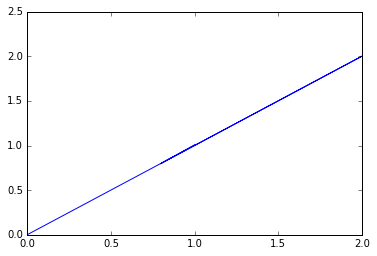

In [71]:
p_ini = cond_ini(0.15,2,1)
t,sol = rk4_a(mov,p_ini,[0,0.006],0,0.001)
plot(sol[0],sol[1])

In [ ]:
ini = rand(200,[-pi/2,pi/2])
for i in range(200):
    sol = rk4_a(ecuacion,ini,t)
    

In [57]:
rand(20,[-pi/2,pi/2])[2]

0.28437677546621476

In [91]:
arreglo_p = arange(len(sol))
for i in arreglo_p:
    arreglo_p[i] = 2
    
print arreglo_p

[2 2 2 ..., 2 2 2]


In [82]:
theta_0 = rand(200,[0,pi*2])
p_0 = rand(200,[-pi/2,pi/2])
print p_0

[ 0.71504044 -0.93779756  0.36526483 -0.75612179  1.36598657  0.35260217
 -0.34238985  1.29224224  0.4308034   1.12120953  0.20029792 -0.2306607
  1.39848214 -0.47316184 -1.1345343  -0.45169533  1.1162549  -0.49943434
 -0.41242013 -1.52822176  0.24422249 -0.39164138 -1.44260824 -1.53712648
 -0.90946542  0.15819708  1.44714111 -0.36400928  0.49548122 -1.14917865
 -0.92329761 -0.28806326 -0.13339447 -1.34899978 -0.18406743 -1.18470135
 -0.79277211  0.15558347 -0.04004273  0.67448333 -1.07448972 -1.30747831
 -1.28470399 -0.28339975 -1.31670642  0.80575    -1.48539041 -1.1529525
  0.95760081  0.2512871   0.65604731 -0.08451542 -1.42517855  0.17396259
  1.08869308 -0.48807228  0.41483471  0.0757195  -0.85099769 -0.3950372
  0.75481743 -0.2174219   0.19035993  0.40103512  1.15940055 -1.21080229
  1.56572785 -1.01267174  1.29651457  0.46128373 -0.62389352 -0.23006221
 -0.09479374  1.10966633  1.16917727 -1.33143092  1.31289423  1.44476742
  0.18854618  0.46502134 -0.33614784  1.1459423   1.55

In [ ]:
arreglo_p = arange(len(sol))
p_0 = rand(200,[-pi/2,pi/2])
for i in arreglo_p:
    arreglo_p[i] = p_0[i]
    
print arreglo

In [99]:
a = array(2,3,4)

print a

ValueError: only 2 non-keyword arguments accepted

In [103]:
a = zeros(7)
a[1] = 3.5
print a

[ 0.   3.5  0.   0.   0.   0.   0. ]


In [125]:
3.2%2

1.2000000000000002

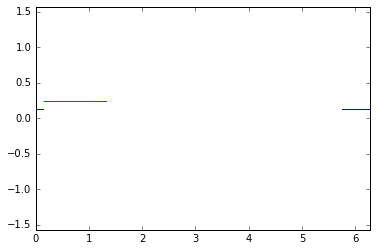

In [131]:
p_0 = rand(200,[-pi/2,pi/2])
theta_0 = rand(200,[0,pi*2])

#for i in arreglo_p:
    #arreglo_p[i] = p_0[i]

for j in arange(1):
    p_j = p_0[j]
    theta_j = theta_0[j]
    t,sol = rk4_a(ecuacion,[theta_j],[0,5],p_j)
    
    arreglo_p = zeros(len(sol))
    for i in arange(len(sol)):
        arreglo_p[i] = p_j
    
    for k in arange(len(sol)):
        if sol[k] < 0:
            sol[k] = sol[k] + 2*pi
            
        elif sol[k] > 2*pi:
            sol[k] = sol[k] - 2*pi
            
    
    plot(sol,arreglo_p,'.',markersize = 0.5)
    xlim(0,2*pi)
    ylim(-pi/2,pi/2)

    
for j in arange(1):
    p_j = p_0[j] + 0.1
    theta_j = sol[-1]
    t,sol = rk4_a(ecuacion,[theta_j],[5,10],p_j)
    
    arreglo_p = zeros(len(sol))
    for i in arange(len(sol)):
        arreglo_p[i] = p_j
    
    for k in arange(len(sol)):
        if sol[k] < 0:
            sol[k] = sol[k] + 2*pi
            
        elif sol[k] > 2*pi:
            sol[k] = sol[k] - 2*pi
            
    
    plot(sol,arreglo_p,'.',markersize = 0.5)
    xlim(0,2*pi)
    ylim(-pi/2,pi/2)
    

In [132]:
arange(2)

array([0, 1])

In [61]:
1./6.

0.16666666666666666